In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
TD = pd.read_excel('Tableau_Declarations-Prealables-Embauche.xlsx',header=0)
TD.head()

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
0,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
1,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
3,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
4,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818


In [4]:
TD.index

RangeIndex(start=0, stop=530, step=1)

In [5]:
mask_CDD = TD['Nature_de_contrat'].str.match("CDD.*")
CDD=TD[mask_CDD]
 
rng = pd.date_range('2000 Jan 1', periods=len(CDD), freq='MS')
CDD.index = rng
CDD


,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
2000-01-01,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
2000-02-01,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
2000-03-01,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818
2000-04-01,2000,2,2000-04-30,Contrat de plus d'un mois,CDD de plus d'un mois,276084,323029
2000-05-01,2000,2,2000-05-31,Contrat de plus d'un mois,CDD de plus d'un mois,296619,339371
...,...,...,...,...,...,...,...
2021-09-01,2021,3,2021-09-30,Contrat de plus d'un mois,CDD de plus d'un mois,802787,426257
2021-10-01,2021,4,2021-10-31,Contrat de plus d'un mois,CDD de plus d'un mois,390167,407504
2021-11-01,2021,4,2021-11-30,Contrat de plus d'un mois,CDD de plus d'un mois,352382,399448
2021-12-01,2021,4,2021-12-31,Contrat de plus d'un mois,CDD de plus d'un mois,252993,395038


In [6]:
mask_CDI = TD['Nature_de_contrat'].str.match("CDI.*")
CDI=TD[mask_CDI]
rng = pd.date_range('2000 Jan 1', periods=len(CDI), freq='MS')
CDI.index = rng
CDI.describe()

,Annee,Trimestre,DPAE_brut,DPAE_cvs
count,265.000000,265.000000,265.000000,265.000000
mean,2010.543396,2.494340,279470.543396,278971.501887
std,6.383499,1.121825,73946.442828,41649.799392
min,2000.000000,1.000000,102113.000000,106721.000000
25%,2005.000000,1.000000,230809.000000,250402.000000
50%,2011.000000,2.000000,261842.000000,270705.000000
75%,2016.000000,3.000000,315708.000000,293333.000000
max,2022.000000,4.000000,615103.000000,409838.000000


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

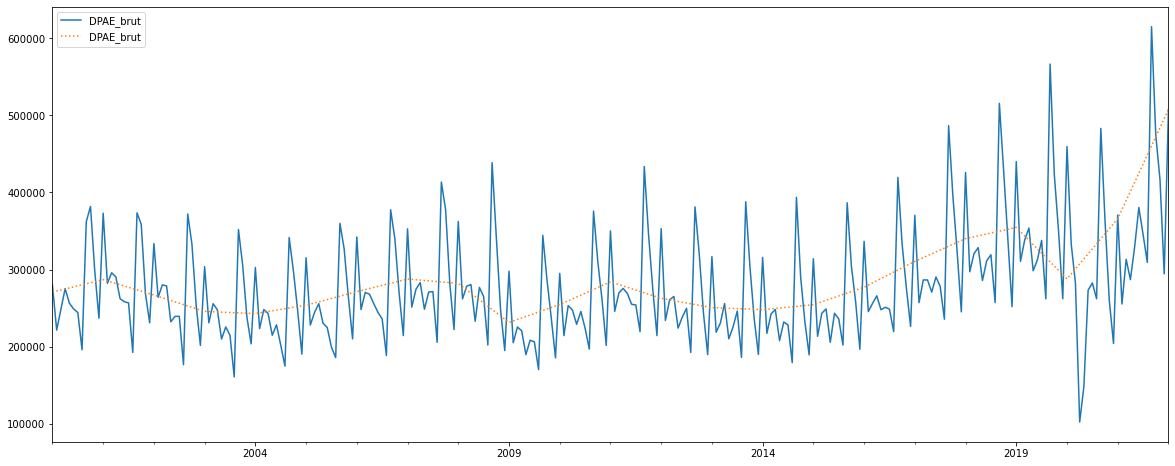

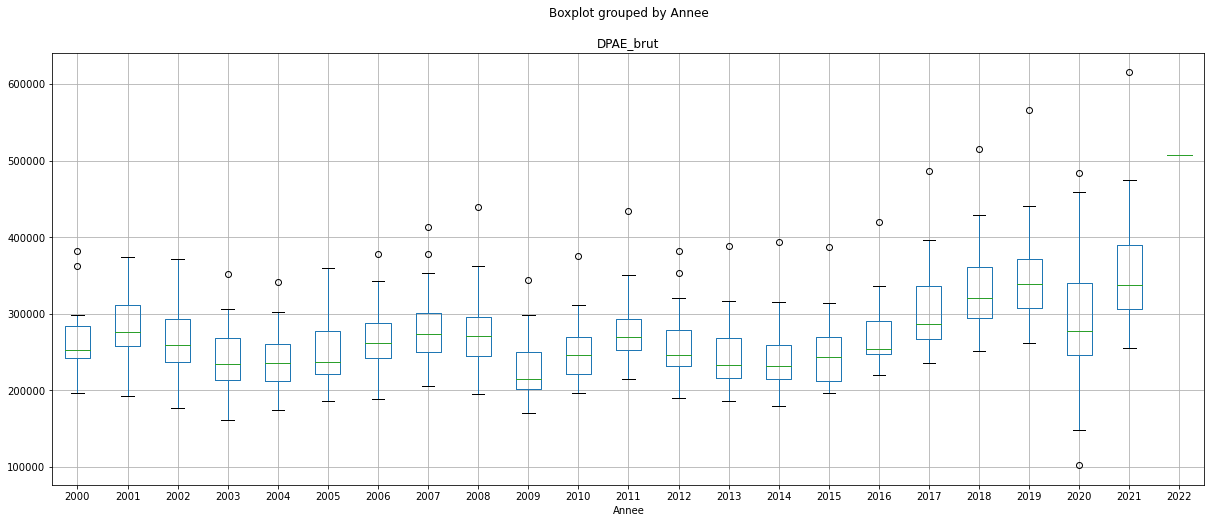

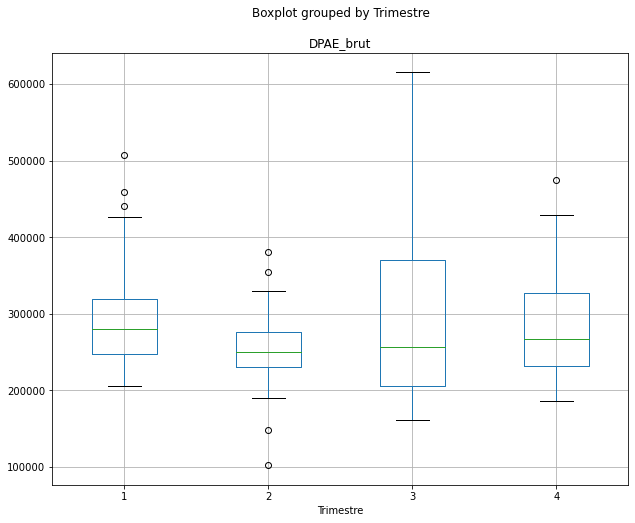

In [7]:
ax= CDI.plot(y=["DPAE_brut"],style='-')
CDI.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))

CDI.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8))
CDI.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8))


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

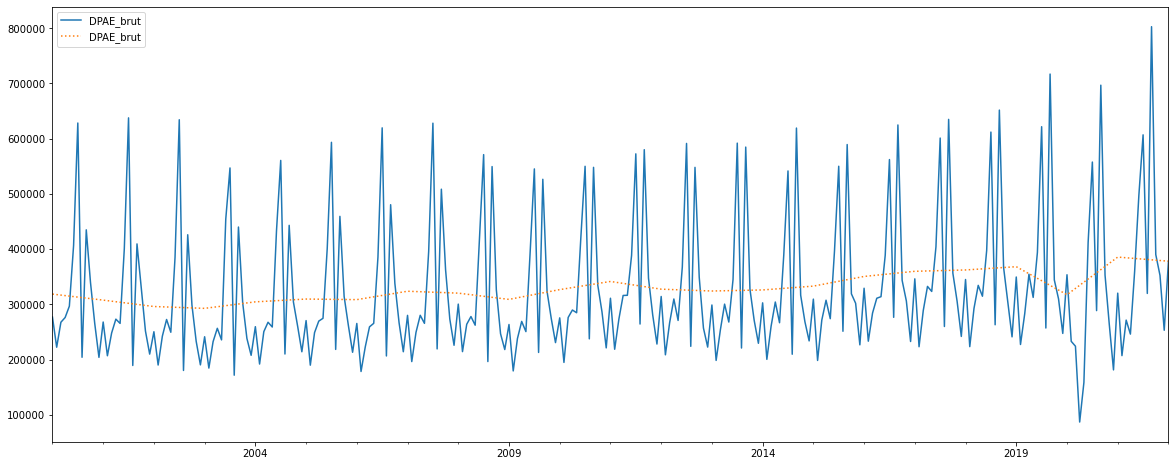

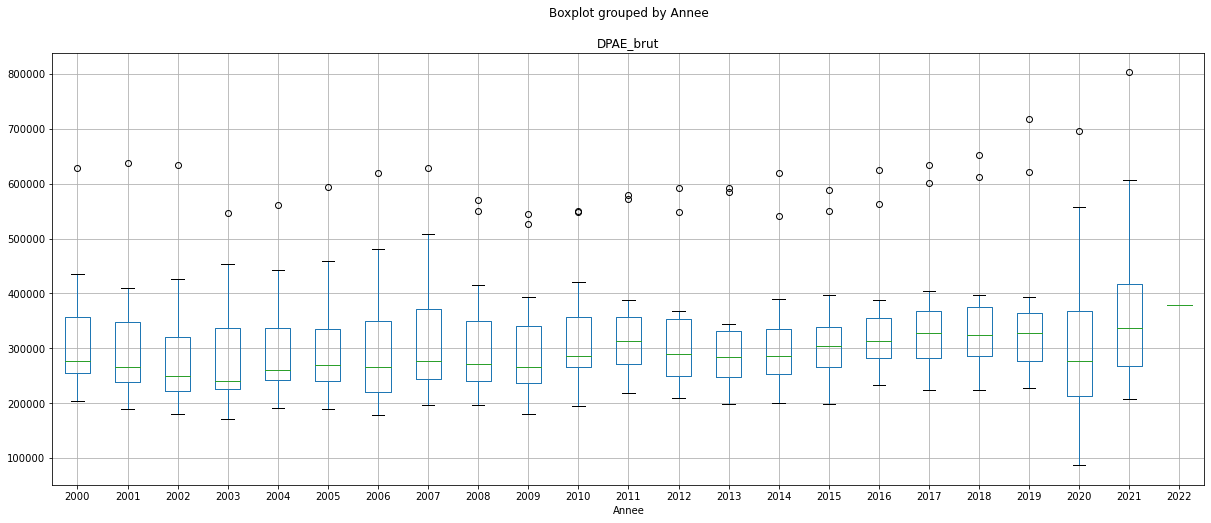

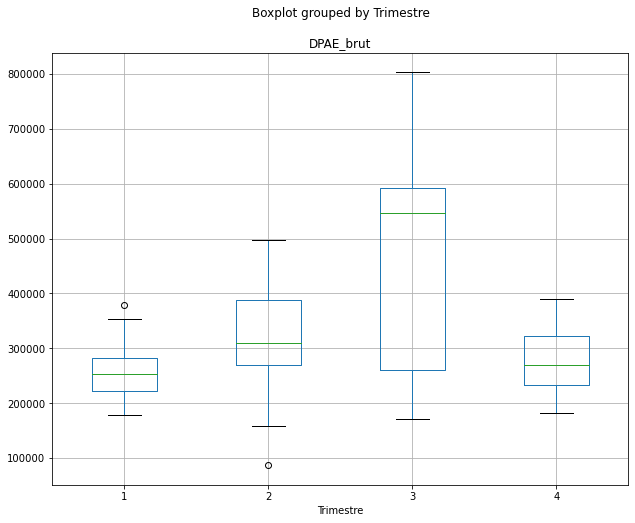

In [8]:
ax= CDD.plot(y=["DPAE_brut"],style='-')
CDD.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))

CDD.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8))
CDD.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8))


In [9]:
EES = pd.read_excel('Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx',index_col=0)

In [10]:
EES.head(5)


,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235,09/03/2022 07:30,NaN,5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1577236,09/03/2022 07:30,NaN,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237,09/03/2022 07:30,NaN,5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241,09/03/2022 07:30,NaN,293.2,293.5,293.9,294.2,294.3,294.6,294.5,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [11]:
EES_A = EES.replace("(O)",pd.NA)

In [12]:
EES_A.head()

,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235,09/03/2022 07:30,NaN,5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1577236,09/03/2022 07:30,NaN,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237,09/03/2022 07:30,NaN,5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241,09/03/2022 07:30,NaN,293.2,293.5,293.9,294.2,294.3,294.6,294.5,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [13]:
EES_A.isna().sum()
EES_NET = EES_A.drop(["idBank","Dernière mise à jour", "Période"],axis=1)

In [14]:
EES_NET.head(5)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,12815.4,12922.1,13009.7,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769,1773.5,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [15]:
EES_NET=EES_NET.dropna(axis=0)

In [16]:
EES_NET.head(5)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769,1773.5,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381
"Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",507.1,508.2,514.3,523,514.5,510.8,510.7,519.7,520.1,523.1,...,587.6,590.4,589.3,582.9,589,589.2,597.7,603.1,608.6,612.1


In [154]:
EES_NET.loc['total'] = EES_NET.sum(numeric_only=False, axis=0)
EES_NET.tail(1)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
total,63429.2,63477.8,63831.8,64296.8,64554.2,64872.6,65102.6,65532.4,66089.4,66541.4,...,86911.2,87278.6,85268.4,84489.0,85804.2,85429.2,86078.8,87558.6,88088.4,88641.2


In [157]:
EES_NET=EES_NET.T.copy()
EES_NET.head(5)

Libellé,"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,Emplois salariés trimestriels - Construction - A17 : FZ - CVS,...,"Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A38 : CA - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A38 : CD - CVS,Emplois salariés trimestriels - Fabrication de matériels de transport - A38 : CL - CVS,Emplois salariés trimestriels - Construction - A38 : FZ - CVS,"Emplois salariés trimestriels - Commerce, réparation d'automobiles et de motocycles - A38 : GZ - CVS",Emplois salariés trimestriels - Transports et entreposage - A38 : HZ - CVS,Emplois salariés trimestriels - Hébergement et restauration - A38 : IZ - CVS,Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS,Emplois salariés trimestriels - Activités immobilières - A38 : LZ - CVS,total
1970-T4,5447.9,1760.3,5349.1,293.2,507.1,36.5,781.6,558.5,3271,1760.3,...,507.1,36.5,558.5,1760.3,1789.6,997.5,452.8,383.3,114.6,63429.2
1971-T1,5466.3,1759.6,5340.5,293.5,508.2,36,783.7,566.1,3278.8,1759.6,...,508.2,36,566.1,1759.6,1789.4,994,450.9,387.4,114.5,63477.8
1971-T2,5494.7,1764.1,5375.2,293.9,514.3,35.7,788.2,570.6,3292,1764.1,...,514.3,35.7,570.6,1764.1,1804.4,996.3,452.4,394.3,115.8,63831.8
1971-T3,5529.1,1767.8,5428.6,294.2,523,35.2,794.4,574.3,3308,1767.8,...,523,35.2,574.3,1767.8,1821.6,1002.4,454,401.6,117.5,64296.8
1971-T4,5534.1,1761.1,5483.5,294.3,514.5,34.8,798.5,575.4,3316.6,1761.1,...,514.5,34.8,575.4,1761.1,1840.1,1008.5,455.5,410.4,119.5,64554.2


In [158]:
EES_TOTAL = EES_NET['total']
EES_TOTAL



1970-T4    63429.2
1971-T1    63477.8
1971-T2    63831.8
1971-T3    64296.8
1971-T4    64554.2
            ...   
2020-T4    85429.2
2021-T1    86078.8
2021-T2    87558.6
2021-T3    88088.4
2021-T4    88641.2
Name: total, Length: 205, dtype: object

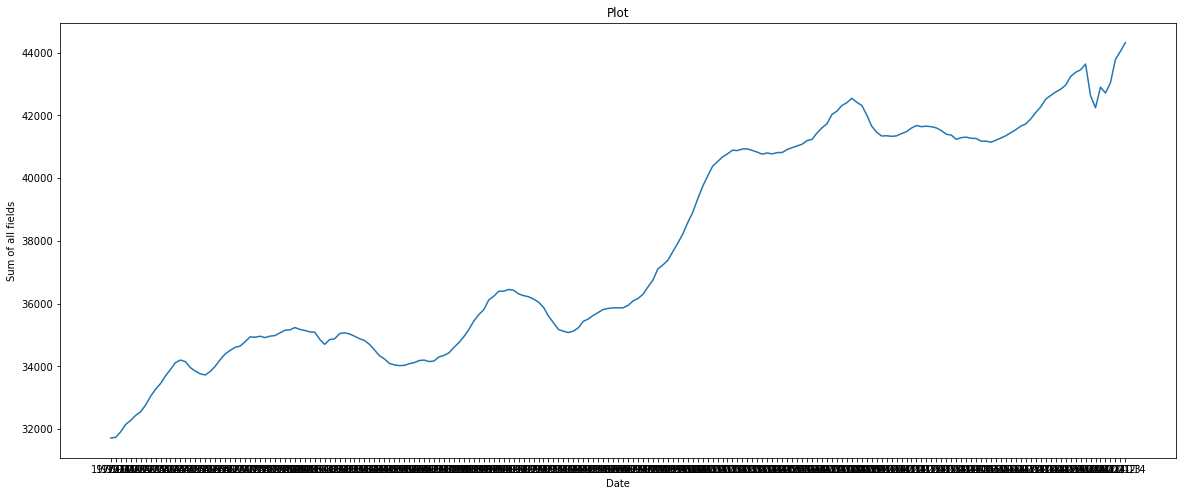

In [52]:
plt.figure(figsize=(20, 8))
plt.plot(EES_TOTAL)
plt.xlabel("Date")
plt.ylabel("Sum of all fields")
plt.title("Plot")

plt.show()

In [159]:
#Selection de 4 secteurs
EES_NET[EES_NET.columns[:4]]

Libellé,"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS"
1970-T4,5447.9,1760.3,5349.1,293.2
1971-T1,5466.3,1759.6,5340.5,293.5
1971-T2,5494.7,1764.1,5375.2,293.9
1971-T3,5529.1,1767.8,5428.6,294.2
1971-T4,5534.1,1761.1,5483.5,294.3
...,...,...,...,...
2020-T4,3110.2,1462.5,12231.7,376.9
2021-T1,3117.4,1493.5,12329.9,378.9
2021-T2,3120.8,1494.5,12606.7,380.1
2021-T3,3126.3,1493,12715.9,380.5


In [160]:
secteur1 = EES_NET[EES_NET.columns[0]].astype(float)
secteur2 = EES_NET[EES_NET.columns[1]].astype(float)
secteur3 = EES_NET[EES_NET.columns[2]].astype(float)
secteur4 = EES_NET[EES_NET.columns[3]].astype(float)

secteurs=[secteur1,secteur2,secteur3,secteur4]


In [161]:
#DEscription des secteurs
for secteur in secteurs :
    print(f"\npour {secteur.name} :\n\n{secteur.describe()}")



pour Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :

count     205.000000
mean     4275.734146
std       854.460778
min      3110.200000
25%      3515.600000
50%      4091.300000
75%      5042.600000
max      5774.000000
Name: Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS, dtype: float64

pour Emplois salariés trimestriels - Construction - Section F - CVS :

count     205.000000
mean     1431.441951
std       158.907811
min      1180.400000
25%      1311.400000
50%      1406.300000
75%      1517.200000
max      1786.600000
Name: Emplois salariés trimestriels - Construction - Section F - CVS, dtype: float64

pour Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :

count      205.000000
mean      9173.452683
std       2236.657959
min       5340.500000
25%       7198.900000
50%       8837.400000
75%      11409.800000
max      12815.100000
Name: Emplois salariés trimestriels - Tertiaire

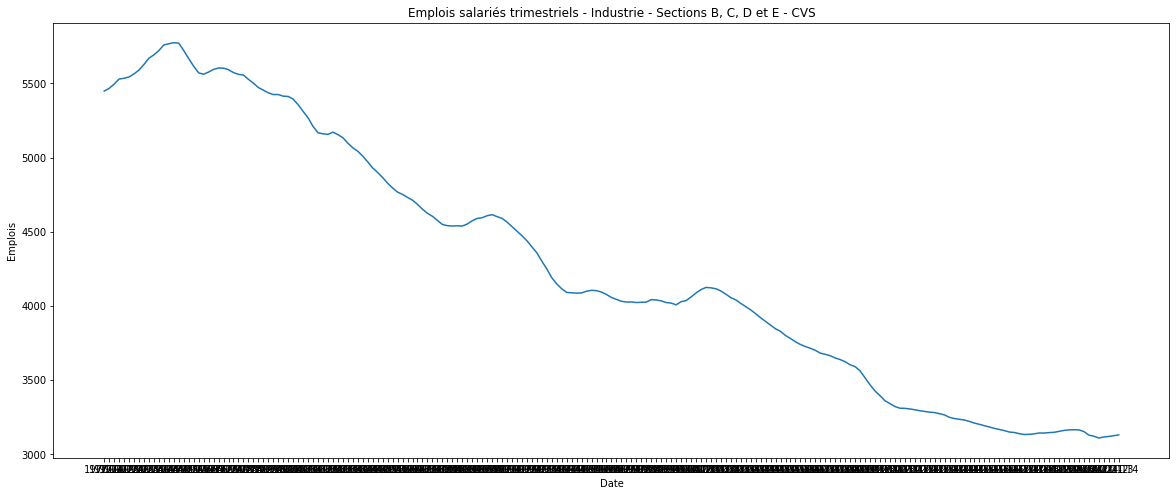

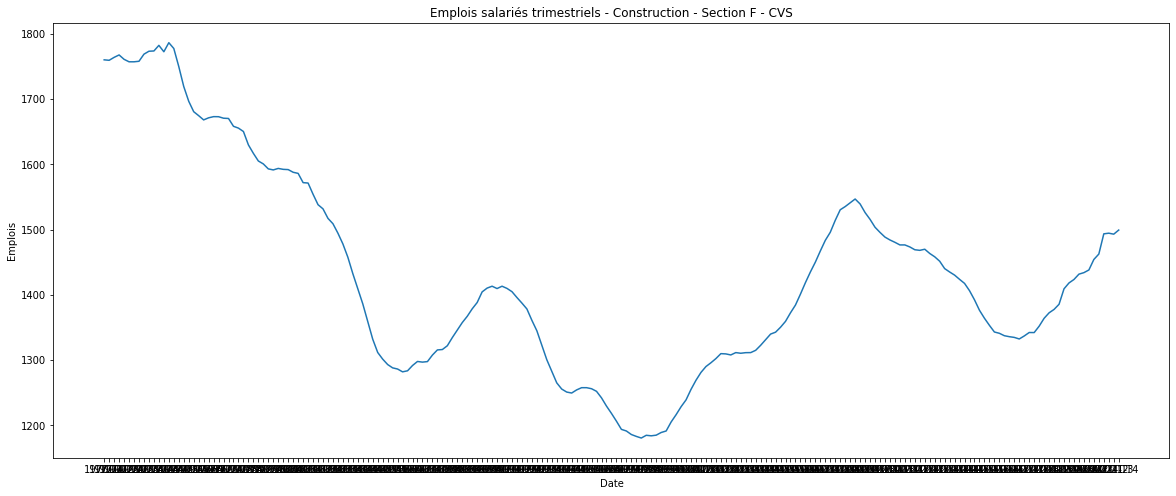

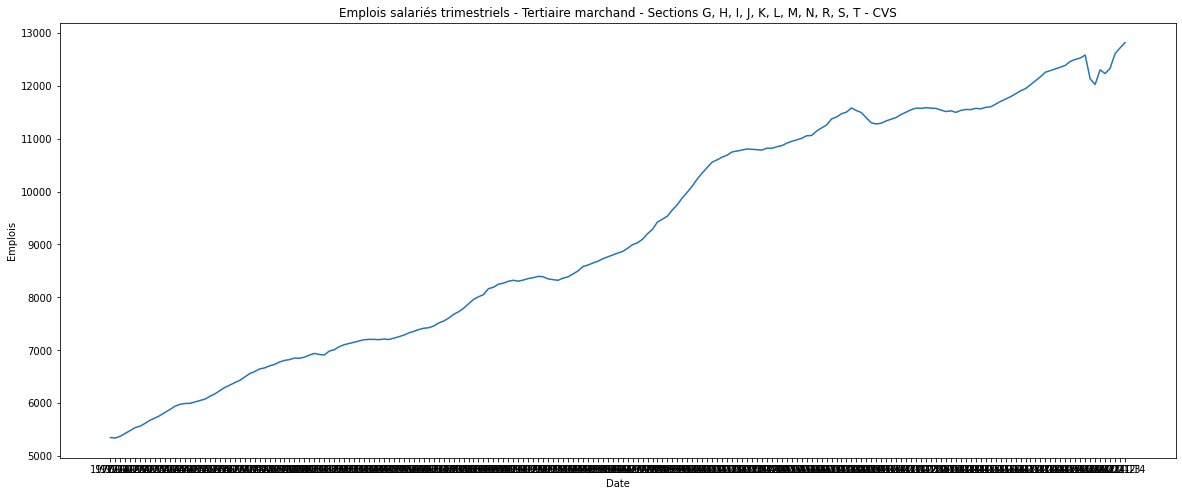

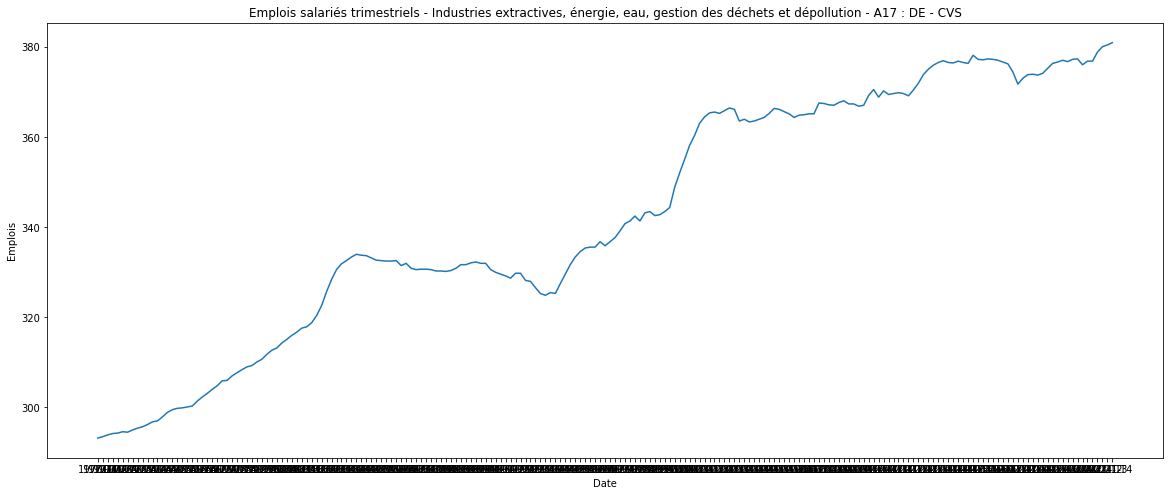

In [162]:
#Plot par secteur
for secteur in secteurs :
    plt.figure(figsize=(20, 8))
    plt.plot(secteur.index, secteur.values)
    plt.xlabel("Date")
    plt.ylabel("Emplois")
    plt.title(secteur.name)
    plt.show()

Question 2 :

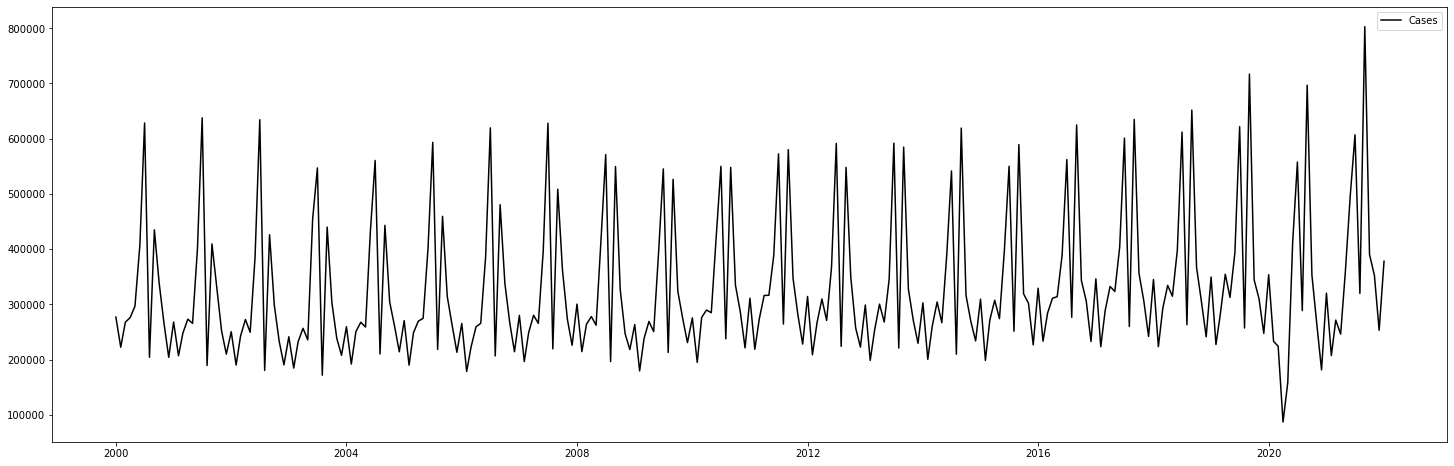

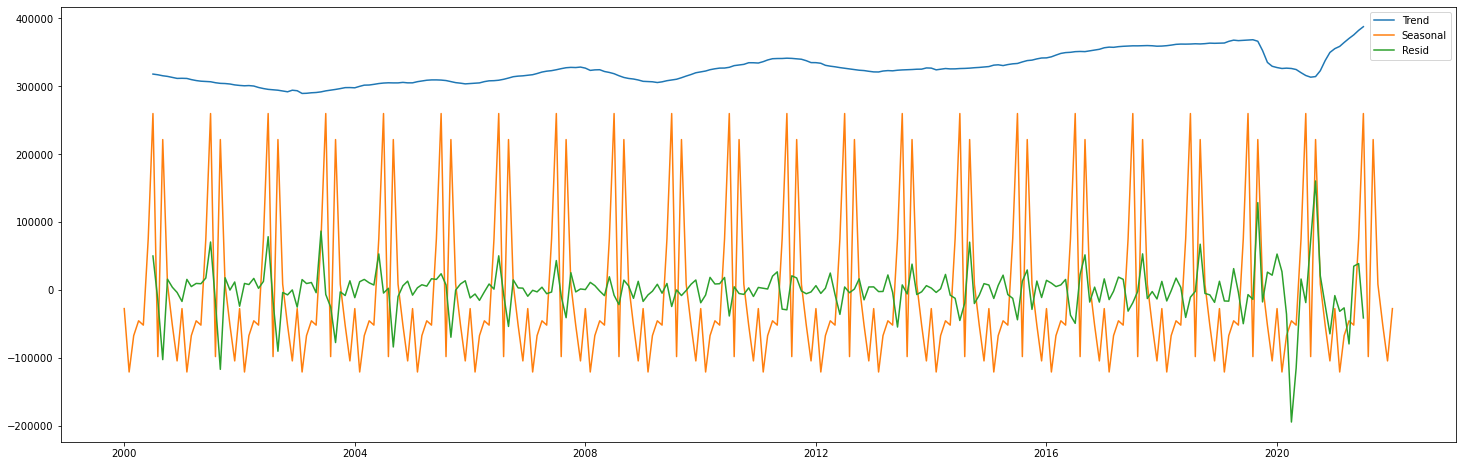

In [116]:
#Saisonalité des CDD

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDD["DPAE_brut"], period=12) 


plt.figure(figsize=(25,8))
plt.plot(CDD.index, CDD["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDD.index,decomposition.trend)
plt.plot(CDD.index,decomposition.seasonal)
plt.plot(CDD.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

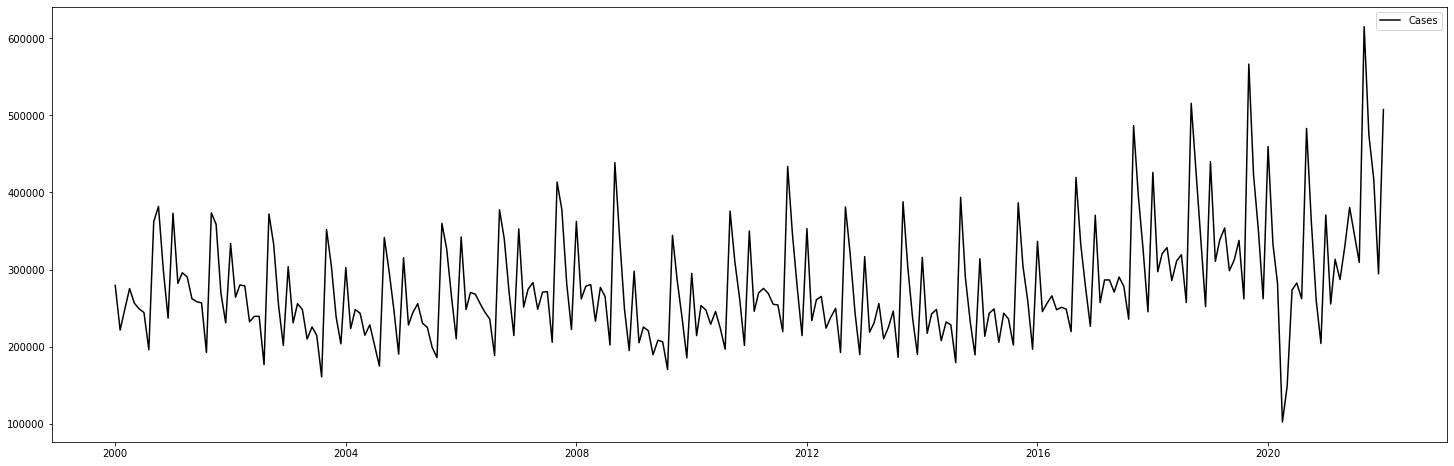

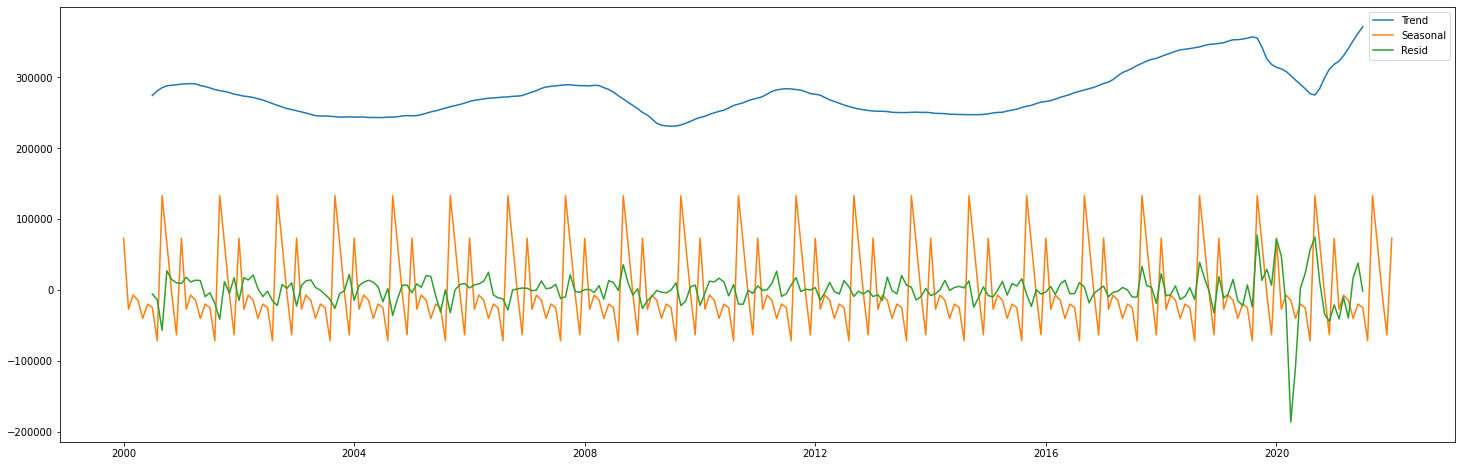

In [163]:
#Saisonalité des CDI

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDI["DPAE_brut"], period=12) 


plt.figure(figsize=(25,8))
plt.plot(CDI.index, CDI["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDI.index,decomposition.trend)
plt.plot(CDI.index,decomposition.seasonal)
plt.plot(CDI.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

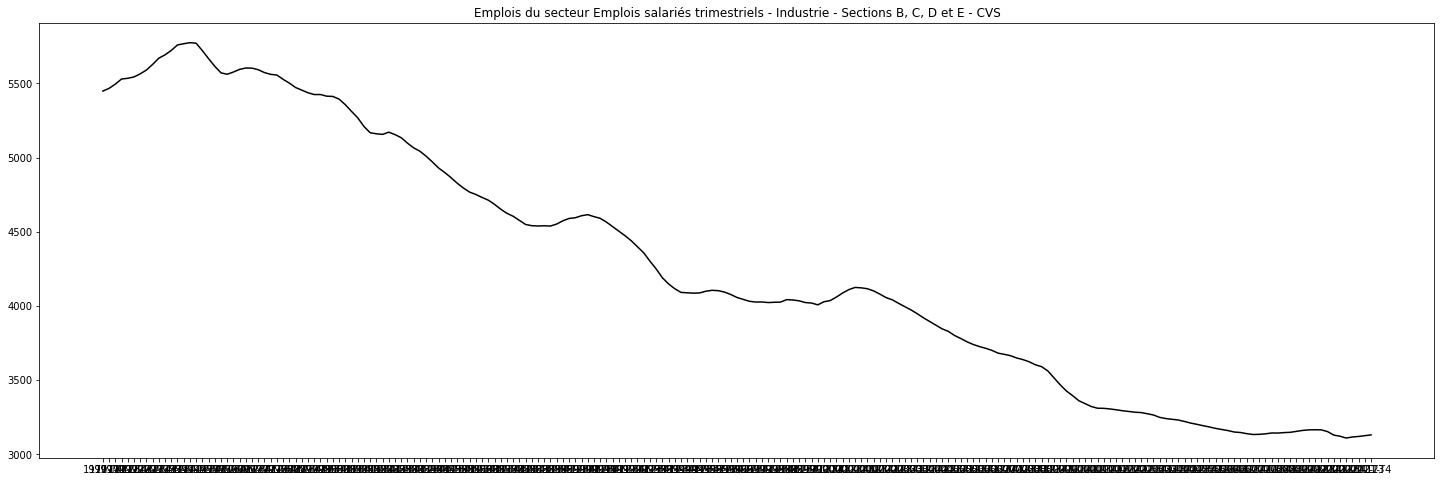

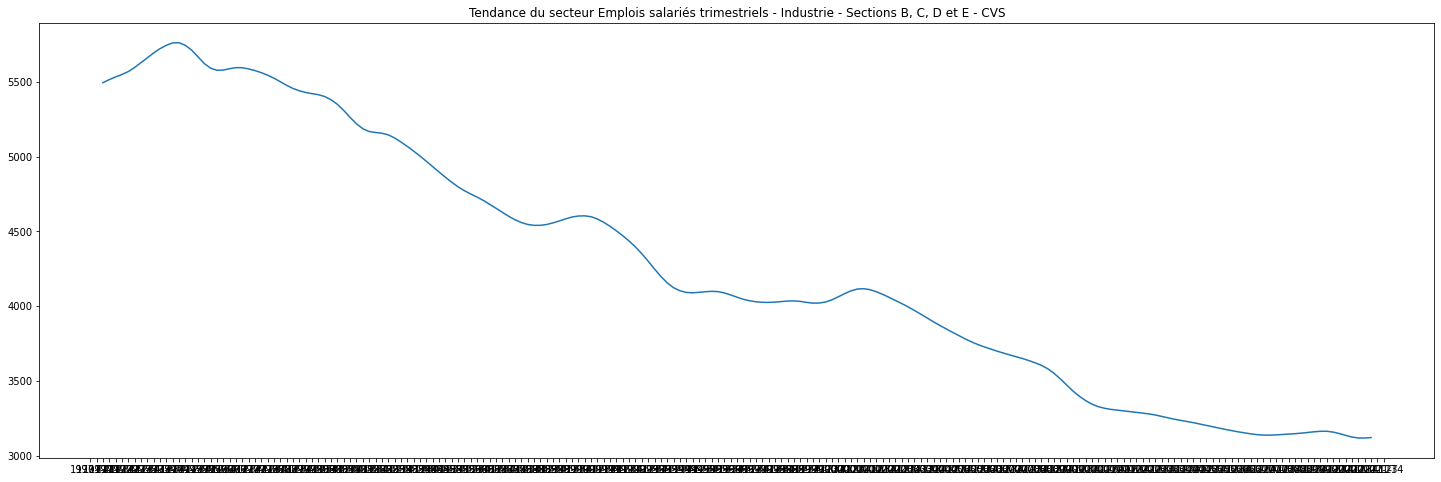

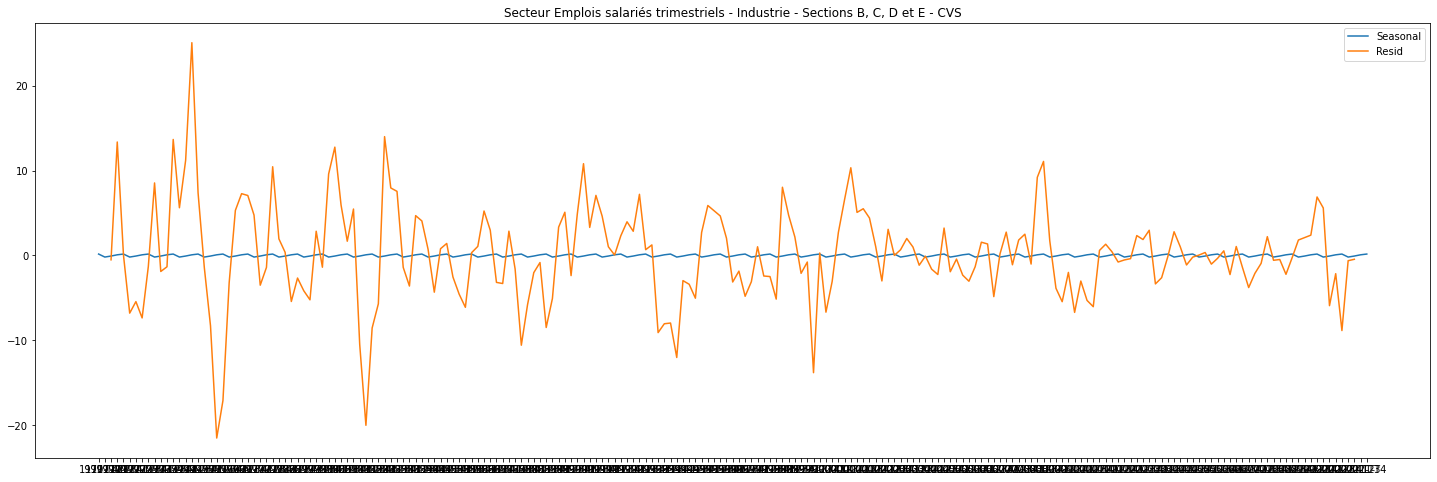

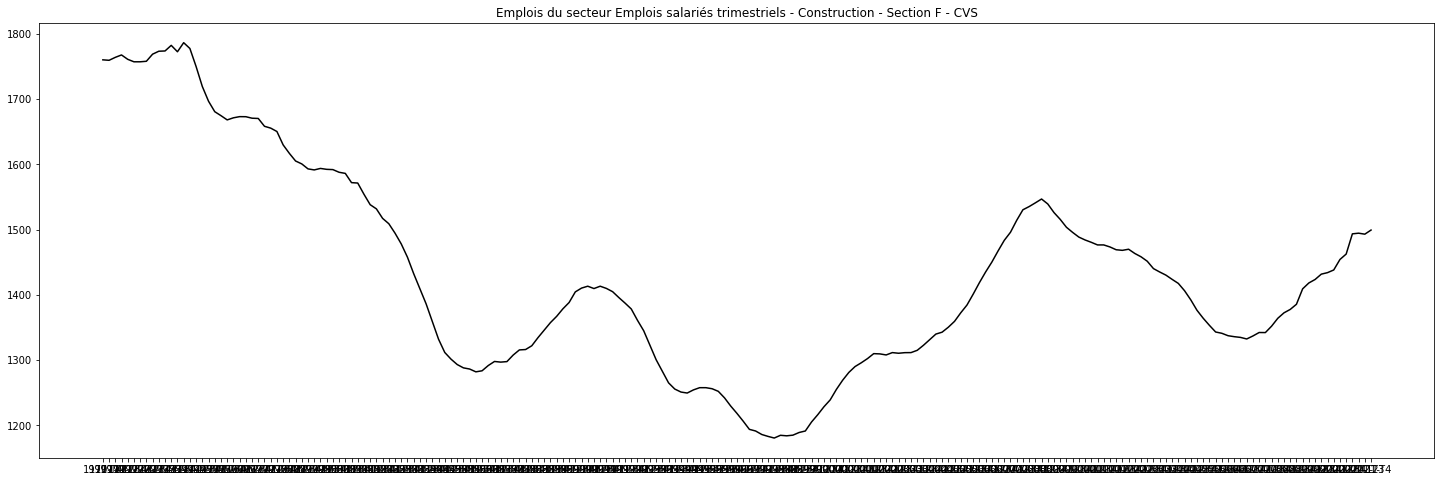

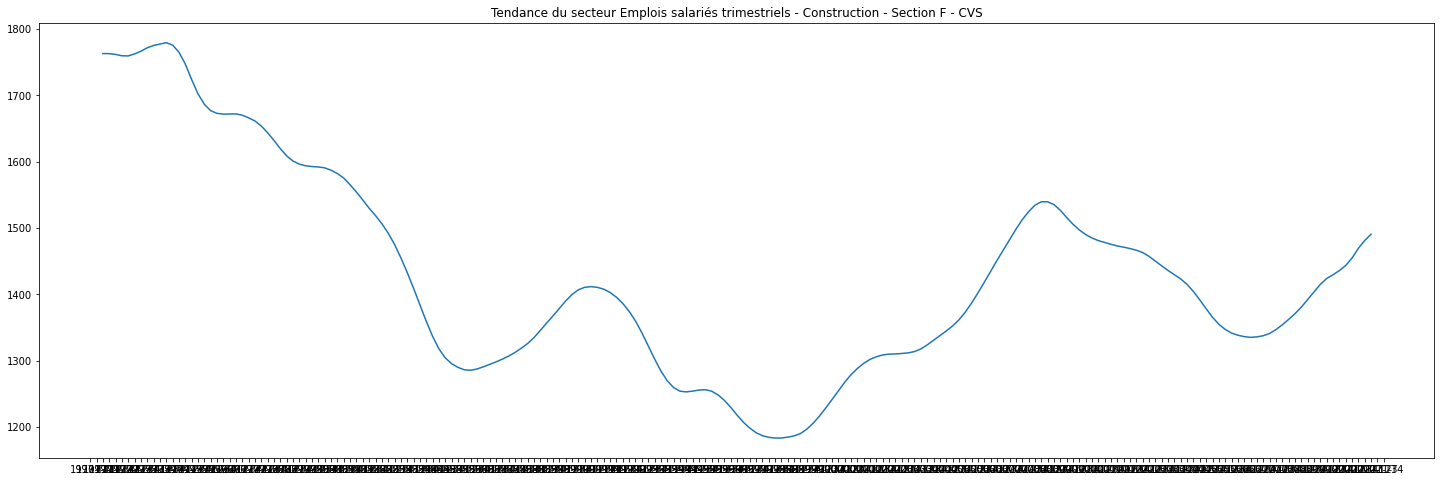

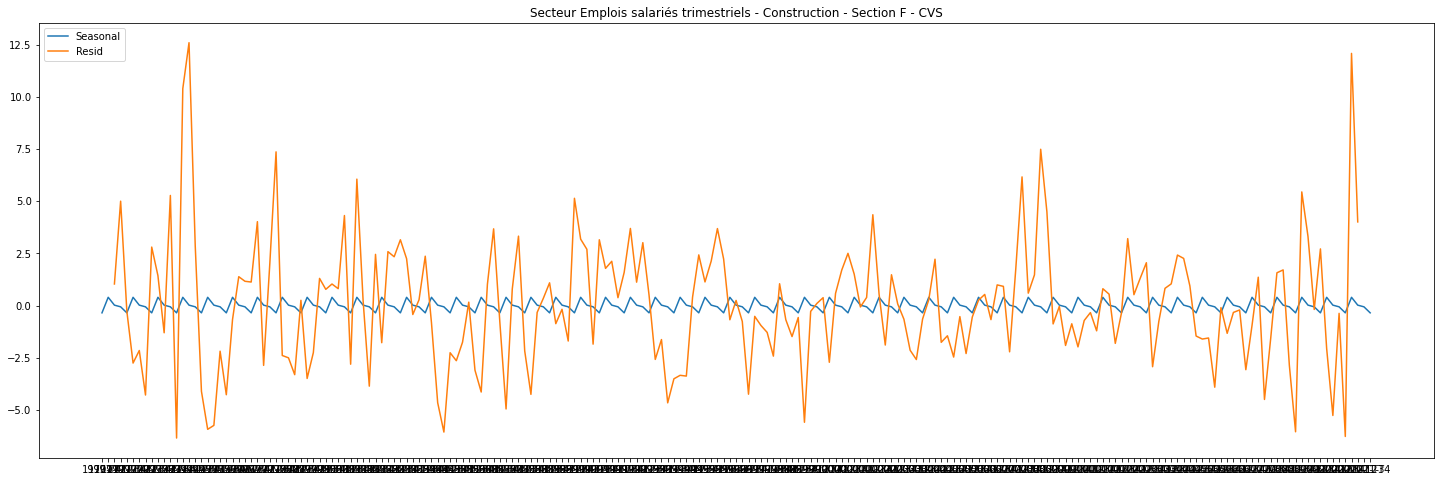

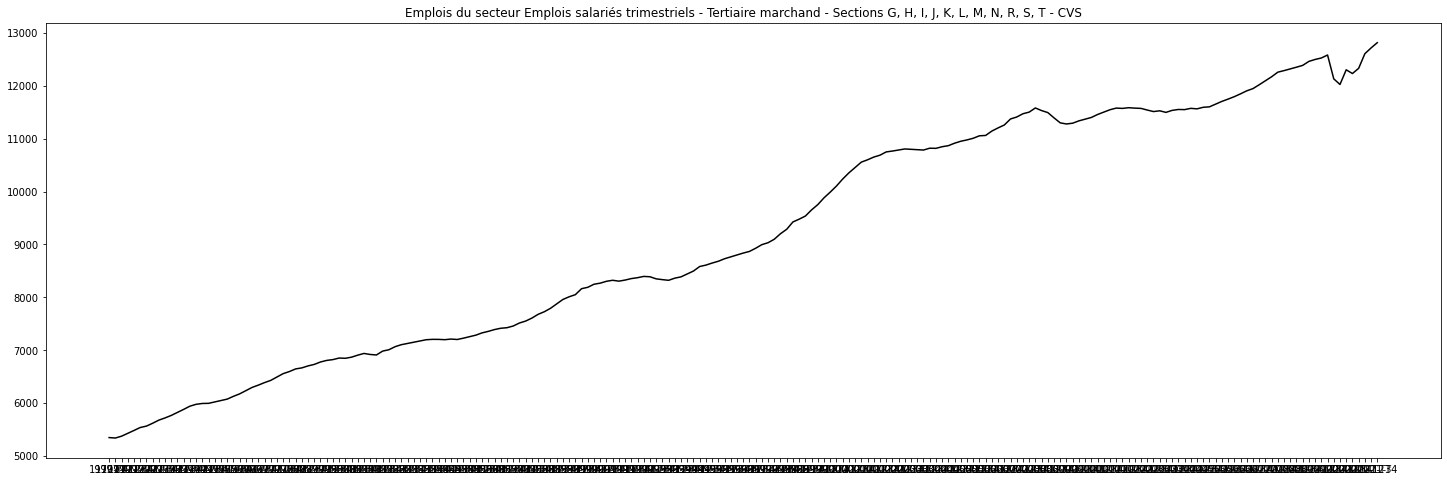

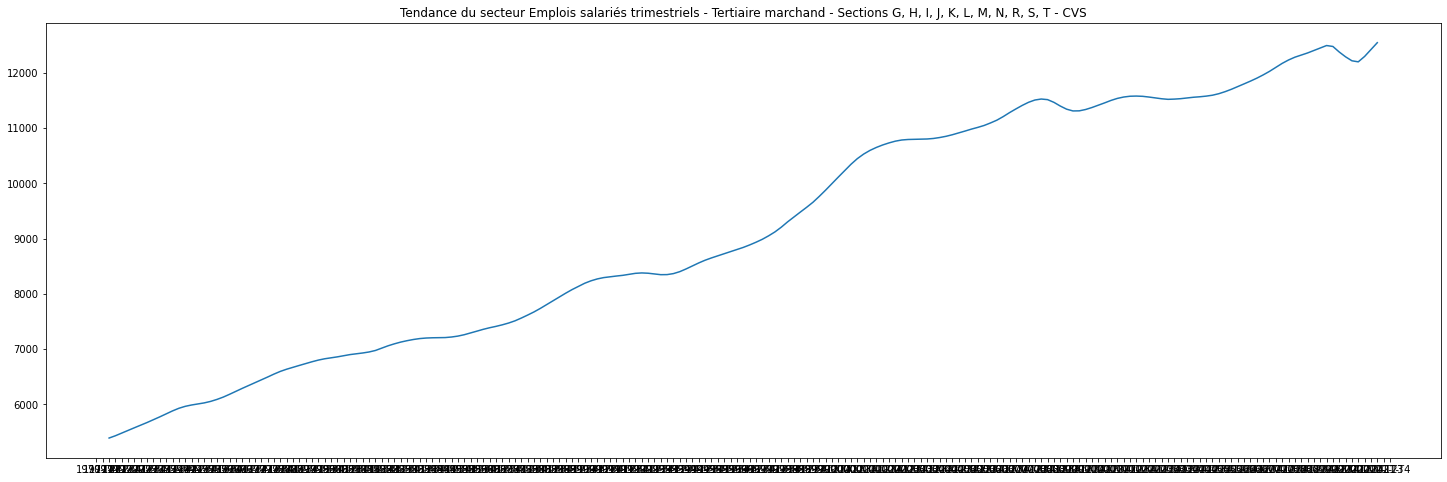

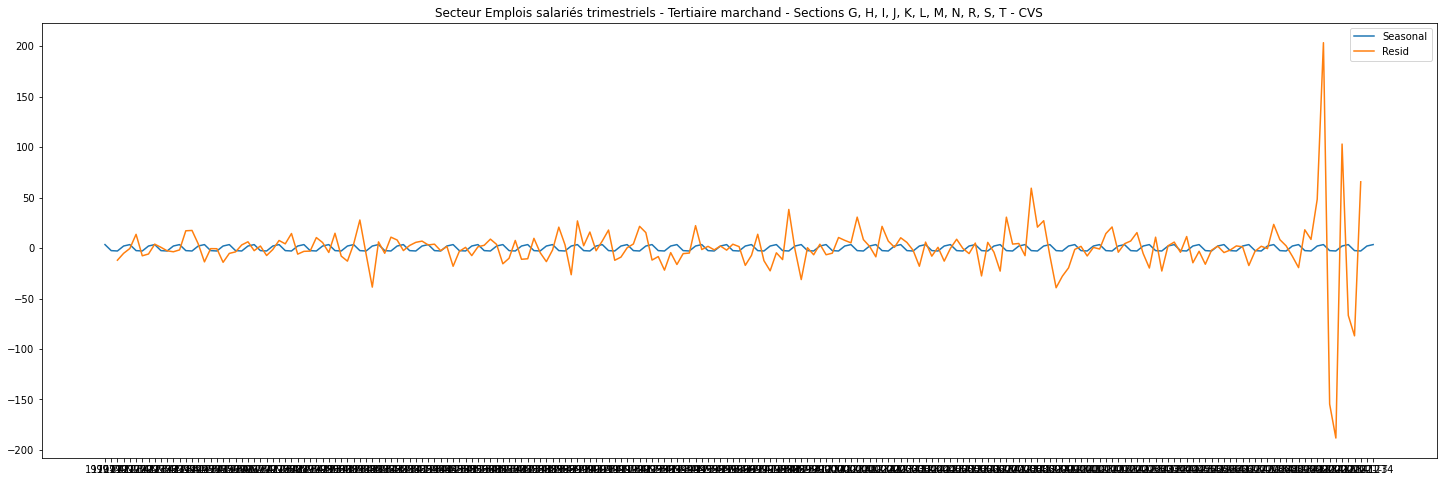

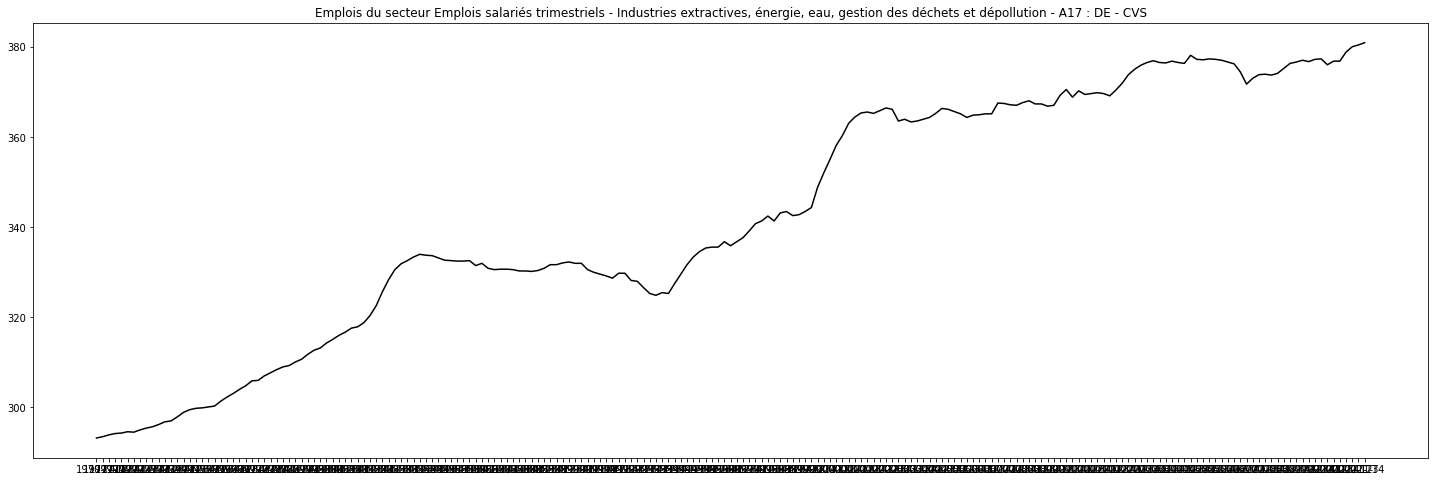

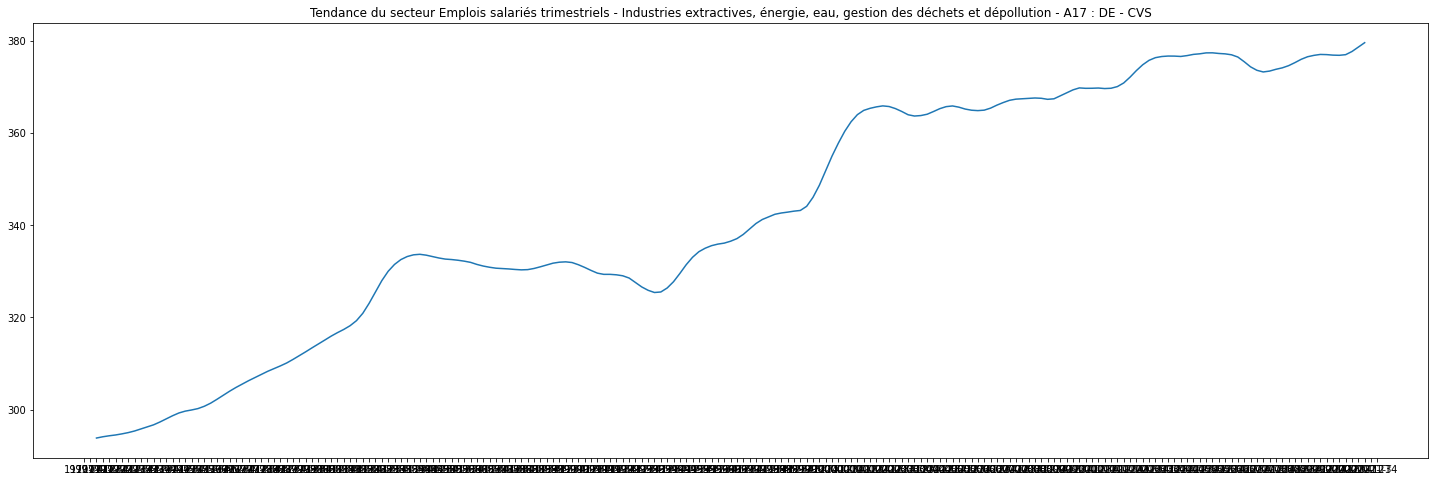

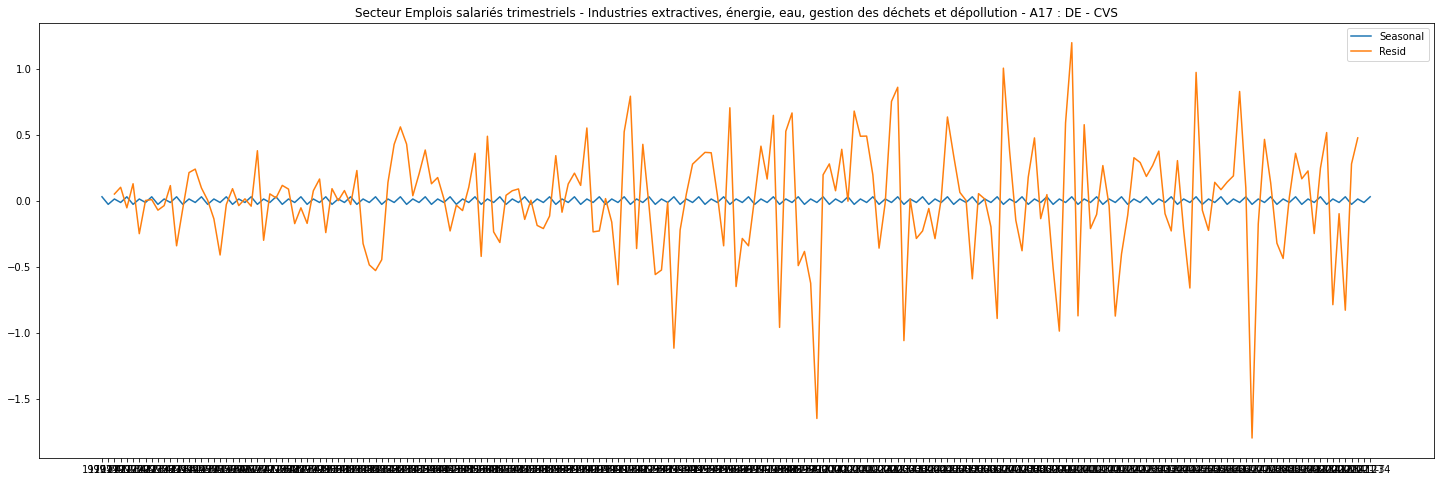

In [175]:
for secteur in secteurs :
    decomposition = seasonal_decompose( secteur.values,period=4)
    #Emplois
    plt.figure(figsize=(25,8))
    plt.plot(secteur.index,secteur.values , 'k')
    plt.title("Emplois du secteur "+secteur.name)
    plt.show()

    # trend
    plt.figure(figsize=(25,8))
    plt.plot(secteur.index,decomposition.trend)
    plt.title("Tendance du secteur "+secteur.name)
    plt.show()

    #seasonal + resid
    plt.figure(figsize=(25,8))
    plt.title("Secteur "+secteur.name)
    plt.plot(secteur.index,decomposition.seasonal)
    plt.plot(secteur.index,decomposition.resid)
    plt.legend(['Seasonal', 'Resid'])
    plt.show()